# KNN 다중분류
- iris 데이터를 이용해서 다중 분류

## 1. 데이터 준비

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 42

In [ ]:
!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv

--2024-06-26 06:00:40--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.77K  --.-KB/s    in 0s      

2024-06-26 06:00:40 (55.5 MB/s) - ‘iris.csv’ saved [3858/3858]



In [ ]:
iris = pd.read_csv('iris.csv')
iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# knn은 그냥 처리하면 됨
# 2중분류, 다중분류가 큰 차이가 없음(val하지말고, test까지만 진행)
# train 80%, test 20%해서 정확도 계산하기까지만 진행
# recall_score(average = 'binary') # binary로 다중분류를 넣으면 error
# average = 'macro'를 사용!

In [ ]:
df = iris.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### 범주형 데이터

In [ ]:
# Species가 범주형 데이터
df['Species'].nunique()

3

In [ ]:
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species'>

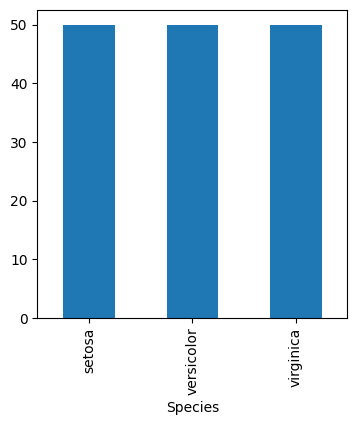

In [ ]:
# 막대그래프 그리기
df['Species'].value_counts().plot(kind='bar', figsize=(4, 4))

### 연속형 변수

In [ ]:
# setosa
# versicolor
# virginica
df_setosa = df[df['Species'] == 'setosa']
df_versicolor = df[df['Species'] == 'versicolor']
df_virginica = df[df['Species'] == 'virginica']

In [ ]:
df.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'Species'],
      dtype='object')

(array([1., 0., 0., 2., 0., 3., 3., 7., 2., 0., 2., 2., 3., 6., 0., 3., 3.,
        2., 2., 3., 0., 0., 1., 1., 0., 0., 1., 2., 0., 1.]),
 array([4.5 , 4.58, 4.66, 4.74, 4.82, 4.9 , 4.98, 5.06, 5.14, 5.22, 5.3 ,
        5.38, 5.46, 5.54, 5.62, 5.7 , 5.78, 5.86, 5.94, 6.02, 6.1 , 6.18,
        6.26, 6.34, 6.42, 6.5 , 6.58, 6.66, 6.74, 6.82, 6.9 ]),
 <BarContainer object of 30 artists>)

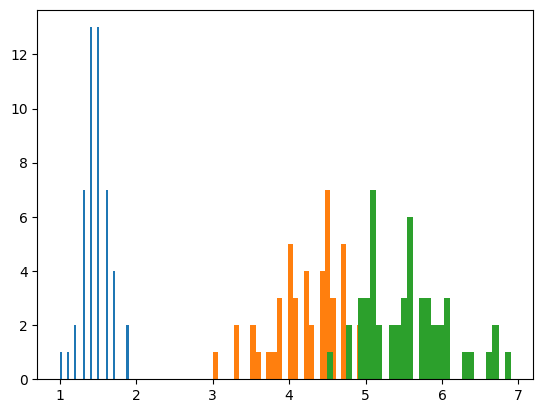

In [ ]:
plt.hist(df_setosa['Petal Length'], bins=30)
plt.hist(df_versicolor['Petal Length'], bins=30)
plt.hist(df_virginica['Petal Length'], bins=30)

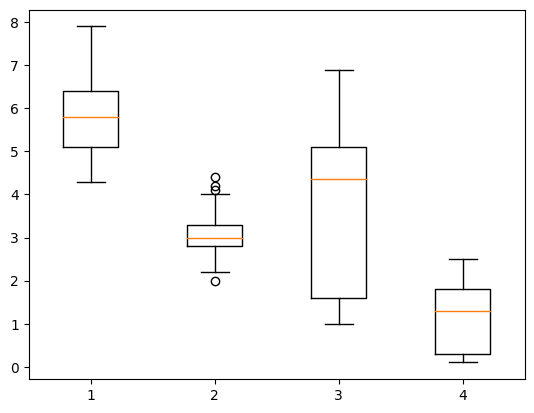

In [ ]:
plt.boxplot(df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']])
plt.show()

### 결측치

In [ ]:
df.isna().sum(axis=0)

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

### 중복치

In [ ]:
df.duplicated().sum()

1

## 학습용, 테스트 데이터 분리

In [ ]:
df = df.sample(frac = 1)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
80,5.5,2.4,3.8,1.1,versicolor
94,5.6,2.7,4.2,1.3,versicolor
51,6.4,3.2,4.5,1.5,versicolor
75,6.6,3.0,4.4,1.4,versicolor
87,6.3,2.3,4.4,1.3,versicolor


In [ ]:
idx_train = int(len(df) * 0.8)

In [ ]:
train = df.iloc[:idx_train]
test = df.iloc[idx_train:]

train.shape, test.shape

((120, 5), (30, 5))

### X, y 변수 분리

In [ ]:
X_train = train.drop('Species', axis = 1)
y_train = train['Species']

In [ ]:
y_train.value_counts()

Species
versicolor    42
virginica     41
setosa        37
Name: count, dtype: int64

## 스케일링

In [ ]:
u = X_train.mean()
std = X_train.std()
u, std

(Sepal Length    5.900000
 Sepal Width     3.048333
 Petal Length    3.881667
 Petal Width     1.237500
 dtype: float64,
 Sepal Length    0.835051
 Sepal Width     0.445705
 Petal Length    1.749717
 Petal Width     0.751141
 dtype: float64)

In [ ]:
# 표준화
X_train_s = (X_train - u) / std
X_train_s.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
80,-0.479012,-1.454625,-0.046674,-0.183055
94,-0.359259,-0.781534,0.181934,0.083207
51,0.598766,0.340285,0.353390,0.349469
75,0.838272,-0.108443,0.296238,0.216338
87,0.479012,-1.678989,0.296238,0.083207


In [ ]:
ss_dic = {'mean':u, 'std':std}
ss_dic

{'mean': Sepal Length    5.900000
 Sepal Width     3.048333
 Petal Length    3.881667
 Petal Width     1.237500
 dtype: float64,
 'std': Sepal Length    0.835051
 Sepal Width     0.445705
 Petal Length    1.749717
 Petal Width     0.751141
 dtype: float64}

## 인코딩

In [ ]:
label_dict = {'setosa':0, 'versicolor':1, 'virginica':2}

In [ ]:
y_train

80     versicolor
94     versicolor
51     versicolor
75     versicolor
87     versicolor
          ...    
78     versicolor
50     versicolor
19         setosa
130     virginica
64     versicolor
Name: Species, Length: 120, dtype: object

In [ ]:
y_train_e = y_train.map(label_dict)
y_train_e

80     1
94     1
51     1
75     1
87     1
      ..
78     1
50     1
19     0
130    2
64     1
Name: Species, Length: 120, dtype: int64

In [ ]:
X_train_s = X_train_s.to_numpy()
y_train_e = y_train_e.to_numpy()

In [ ]:
print(X_train_s.shape, y_train_e.shape)
print(type(X_train_s), type(y_train_e))

(120, 4) (120,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


## 모델 학습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_s, y_train_e)

KNeighborsClassifier()

## 테스트

In [ ]:
test.shape

(30, 5)

In [ ]:
test.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
38,4.4,3.0,1.3,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa
71,6.1,2.8,4.0,1.3,versicolor
88,5.6,3.0,4.1,1.3,versicolor
138,6.0,3.0,4.8,1.8,virginica


In [ ]:
X_test = test.drop('Species', axis = 1)
y_test = test['Species']

In [ ]:
X_test_s = (X_test - ss_dic['mean']) / ss_dic['std']
y_test_e = y_test.map(label_dict)

In [ ]:
X_test_s = X_test_s.to_numpy()
y_test_e = y_test_e.to_numpy()

In [ ]:
X_test_s.shape, y_test_e.shape

((30, 4), (30,))

In [ ]:
y_pred = clf.predict(X_test_s)

In [ ]:
(y_pred == y_test_e).sum()/len(y_test_e)

0.9333333333333333

In [ ]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test_e, y_pred)
cfm

array([[13,  0,  0],
       [ 0,  8,  0],
       [ 0,  2,  7]])

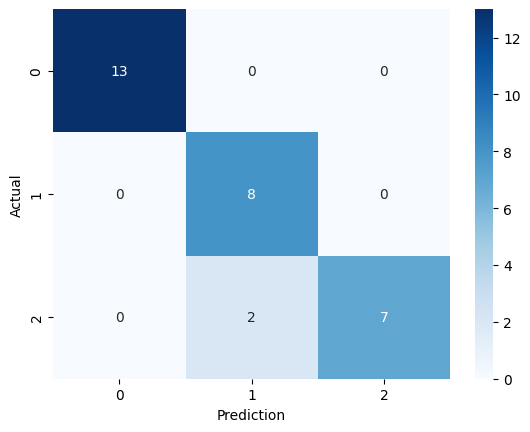

In [ ]:
# 보기 쉽게 그래프로 그리기
s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt = 'd')
s.set(xlabel='Prediction', ylabel='Actual')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy:", accuracy_score(y_test_e, y_pred))
print("recall_score:", recall_score(y_test_e, y_pred, average = 'macro'))
print("precision_score:", precision_score(y_test_e, y_pred, average = 'macro'))
print("f1_score:", f1_score(y_test_e, y_pred, average = 'macro'))

accuracy: 0.9333333333333333
recall_score: 0.9259259259259259
precision_score: 0.9333333333333332
f1_score: 0.9212962962962963
